# Create Pollutant Datasets

In [10]:
import pandas as pd
import datetime as dt
import numpy as np
from pandas.tseries.offsets import DateOffset
import matplotlib as mpl
import matplotlib.pyplot as plt

In [11]:
#matplotlib ~aesthetics~ updated 18 August 2023
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['ytick.labelsize'] = 30
mpl.rcParams['xtick.labelsize'] = 30
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams["axes.labelweight"] = "bold"
np.set_printoptions(suppress=True)
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["savefig.facecolor"]= '#FFFFFF'
mpl.rcParams['lines.markersize'] = 10
mpl.rcParams['font.size']= 30
plt.rcParams['font.size']= 30

In [25]:
plt.style.use('mpl_config.mplstyle')

In [13]:
from rx_burn_datetime_index_config import *

# Load and process unaligned BC data

In [14]:
#file path and file names for AE33 data
base = '/Users/jdabutler/Documents/+github/rx burn/field data/AE33/csv/'
day1 = 'day1_20210420.csv'
day2 = 'day2_20210421.csv'
day3 = 'day3_20210422.csv'
day4 = 'day4_20210423.csv'

#load each day of AE33 into a dataframe; combine date and time into one column datetime; print out column headers for AE33
df1 = pd.read_csv(base + day1,parse_dates =[['Date(yyyy/MM/dd)','Time(hh:mm:ss)']])
df2 = pd.read_csv(base + day2,parse_dates =[['Date(yyyy/MM/dd)','Time(hh:mm:ss)']])
df3 = pd.read_csv(base + day3,parse_dates =[['Date(yyyy/MM/dd)','Time(hh:mm:ss)']])
df4 = pd.read_csv(base + day4,parse_dates =[['Date(yyyy/MM/dd)','Time(hh:mm:ss)']])
df1 = df1.rename(columns = {'Date(yyyy/MM/dd)_Time(hh:mm:ss)':'datetime'})
df2 = df2.rename(columns = {'Date(yyyy/MM/dd)_Time(hh:mm:ss)':'datetime'})
df3 = df3.rename(columns = {'Date(yyyy/MM/dd)_Time(hh:mm:ss)':'datetime'})
df4 = df4.rename(columns = {'Date(yyyy/MM/dd)_Time(hh:mm:ss)':'datetime'})

#initially noted in the field that datetime of AE33 was 20 seconds behind computer UCR research team employed

#df1['datetime'] = df1.datetime + dt.timedelta(seconds=20)
#df2['datetime'] = df2.datetime + dt.timedelta(seconds=20)
#df3['datetime'] = df3.datetime + dt.timedelta(seconds=20)
#df4['datetime'] = df4.datetime + dt.timedelta(seconds=20)

# convert datetimes to pandas timestamps
df1.datetime = pd.to_datetime(df1.datetime)
df2.datetime = pd.to_datetime(df2.datetime)
df3.datetime = pd.to_datetime(df3.datetime)
df4.datetime = pd.to_datetime(df4.datetime)

#set index of AE33 dataframes for each day to datetime
df1 = df1.set_index('datetime')
df2 = df2.set_index('datetime')
df3 = df3.set_index('datetime')
df4 = df4.set_index('datetime')

In [15]:
ABCD_header = ["datetime","RefVolt","SigVolt","ATN","BC","RH","Temp","FR","Vbatt"]

#file path and file names for minutely QAQCed ABCD data
bABCD = '/Users/jdabutler/Documents/+github/rx burn/field data/ABCD - ground'
d1_52 =  'C52 - d1/I87.csv'
d1_138 = 'C138 - d1/I87_QAQC_minutely.csv'
d2_133 = 'C133 - d2/I87_QAQC_minutely.csv'
d2_138 = 'C138 - d2/I87_QAQC_minutely.csv'
d3_133 = 'C133 - d3/I87_QAQC_minutely.csv'
d3_138 = 'C138 - d3/I87_QAQC_minutely.csv'
d4_133 = 'C133 - d4/I87_QAQC_minutely.csv'

#file paths and names for 1 Hz QAQCed ABCD data
d1_138hz = 'C138 - d1/I87_QAQC_1Hz.csv'
d2_133hz = 'C133 - d2/I87_QAQC_1Hz.csv'
d2_138hz = 'C138 - d2/I87_QAQC_1Hz.csv'
d3_133hz = 'C133 - d3/I87_QAQC_1Hz.csv'
d3_138hz = 'C138 - d3/I87_QAQC_1Hz.csv'
d4_133hz = 'C133 - d4/I87_QAQC_1Hz.csv'

#read minutely QAQCed CSVs into dataframes
d152 = pd.read_csv(bABCD + '/' + d1_52,names = ABCD_header)
d1138 = pd.read_csv(bABCD + '/' + d1_138)
d2133 = pd.read_csv(bABCD + '/' + d2_133)
d2138 = pd.read_csv(bABCD + '/' + d2_138)
d3133 = pd.read_csv(bABCD + '/' + d3_133)
d3138 = pd.read_csv(bABCD + '/' + d3_138)
d4133 = pd.read_csv(bABCD + '/' + d4_133)

#read 1 Hz QAQC CSV into dataframe
d1138hz = pd.read_csv(bABCD + '/' + d1_138hz)
d2133hz = pd.read_csv(bABCD + '/' + d2_133hz)
d2138hz = pd.read_csv(bABCD + '/' + d2_138hz)
d3133hz = pd.read_csv(bABCD + '/' + d3_133hz)
d3138hz = pd.read_csv(bABCD + '/' + d3_138hz)
d4133hz = pd.read_csv(bABCD + '/' + d4_133hz)

#rename datetime column
d1138.rename(columns = {'Unnamed: 0':'datetime'},inplace=True)
d2133.rename(columns = {'Time':'datetime'},inplace=True)
d2138.rename(columns = {'Unnamed: 0':'datetime'},inplace=True)
d3133.rename(columns = {'Unnamed: 0':'datetime'},inplace=True)
d3138.rename(columns = {'Unnamed: 0':'datetime'},inplace=True)
d4133.rename(columns = {'Time':'datetime'},inplace=True)

d1138hz.rename(columns = {'Unnamed: 0':'datetime'},inplace=True)
d2133hz.rename(columns = {'Unnamed: 0':'datetime'},inplace=True)
d2138hz.rename(columns = {'Unnamed: 0':'datetime'},inplace=True)
d3133hz.rename(columns = {'Unnamed: 0':'datetime'},inplace=True)
d3138hz.rename(columns = {'Unnamed: 0':'datetime'},inplace=True)
d4133hz.rename(columns = {'Time':'datetime'},inplace=True)

#convert epoch time to pandas datetime
d152.datetime = pd.to_datetime(d152.datetime,unit = 's')
d1138.datetime = pd.to_datetime(d1138.datetime)
d2133.datetime = pd.to_datetime(d2133.datetime)
d2138.datetime = pd.to_datetime(d2138.datetime)
d3133.datetime = pd.to_datetime(d3133.datetime)
d3138.datetime = pd.to_datetime(d3138.datetime)
d4133.datetime = pd.to_datetime(d4133.datetime)

d1138hz.datetime = pd.to_datetime(d1138hz.datetime)
d2133hz.datetime = pd.to_datetime(d2133hz.datetime)
d2138hz.datetime = pd.to_datetime(d2138hz.datetime)
d3133hz.datetime = pd.to_datetime(d3133hz.datetime)
d3138hz.datetime = pd.to_datetime(d3138hz.datetime)
d4133hz.datetime = pd.to_datetime(d4133hz.datetime)

#set datetime column as index
d152.set_index('datetime',inplace=True)
d1138.set_index('datetime',inplace=True)
d2133.set_index('datetime',inplace=True)
d2138.set_index('datetime',inplace=True)
d3133.set_index('datetime',inplace=True)
d3138.set_index('datetime',inplace=True)
d4133.set_index('datetime',inplace=True)

d1138hz.set_index('datetime',inplace=True)
d2133hz.set_index('datetime',inplace=True)
d2138hz.set_index('datetime',inplace=True)
d3133hz.set_index('datetime',inplace=True)
d3138hz.set_index('datetime',inplace=True)
d4133hz.set_index('datetime',inplace=True)

#drop rows with all NaN values
d152.dropna(how='all',inplace=True)
d1138.dropna(how='all',inplace=True)
d2133.dropna(how='all',inplace=True)
d2138.dropna(how='all',inplace=True)
d3133.dropna(how='all',inplace=True)
d3138.dropna(how='all',inplace=True)
d4133.dropna(how='all',inplace=True)

d1138hz.dropna(how='all',inplace=True)
d2133hz.dropna(how='all',inplace=True)
d2138hz.dropna(how='all',inplace=True)
d3133hz.dropna(how='all',inplace=True)
d3138hz.dropna(how='all',inplace=True)
d4133hz.dropna(how='all',inplace=True)

In [16]:
#file path and file names for raw, uncorrected ABCD data
baseABCD = r'/Users/jdabutler/Documents/+github/rx burn/field data/ABCD - ground/raw'
c138 = r'C138/I87.csv'
c52 = r'C52/I87.csv'
c133 = r'C133/I87.csv'
ABCD_header = ["datetime","RefVolt","SigVolt","ATN","BC","RH","Temp","FR","Vbatt"]

#load in each day of raw, uncorrected ABCD data
df138 = pd.read_csv(baseABCD + '/' + c138, names = ABCD_header)
df52 = pd.read_csv(baseABCD + '/' + c52, names = ABCD_header)
df133 = pd.read_csv(baseABCD + '/' + c133, names = ABCD_header)

#convert epoch time to pandas datetime
df138.datetime = pd.to_datetime(df138.datetime,unit='s')
df52.datetime = pd.to_datetime(df52.datetime,unit='s')
df133.datetime = pd.to_datetime(df133.datetime,unit='s')

#set index of three cell dataframes to datetime column
df138.set_index('datetime', inplace = True)
df52.set_index('datetime', inplace = True)
df133.set_index('datetime',inplace = True)

#set the attenutation tolerance and create a boolean mask for each cell where this tolerance is exceeded
ATN_tol = 100
mask138 = df138.ATN >= ATN_tol
mask52 = df52.ATN >= ATN_tol
mask133 = df133.ATN >= ATN_tol
mask52_d1 = d152.ATN >= ATN_tol

#replace any attentation values greater than or equal to the tolerance as a NaN
df138.loc[mask138,'ATN'] = np.nan
df52.loc[mask52,'ATN'] = np.nan
df133.loc[mask133,'ATN'] = np.nan
d152.loc[mask52_d1,'ATN'] = np.nan

## Combine daily BC dataframes

In [17]:
d152T = d152.resample('1T').mean()
d152T['ATN'] = d152.resample('1T').max().ATN

#join each day of data together into a dataframe for 1 Hz ABCD data, AE33 data and minutely ABCD QAQC 
ABCDhz = pd.concat([d152,d1138hz,d2133hz,d2138hz,d3133hz,d3138hz,d4133hz])
ABCDhz.sort_index(inplace=True)
AE33 = pd.concat([df1,df2,df3,df4])
AE33.sort_index(inplace=True)
ABCDmin = pd.concat([d152T,d1138,d2133,d2138,d3133,d3138,d4133])
ABCDmin.sort_index(inplace=True)

## Create 10-second average AE33 and ABCD dataframes

In [18]:
timebase = '10S'
a = 0.5

#loading artifact correction for 10 sec data on ABCD
ABCD10 = ABCDhz.resample(timebase).mean()
ABCD10.ATN = ABCDhz.ATN.resample(timebase).max()
ABCD10['BC_c'] = ABCD10.BC / ((1 - a) + a*np.exp(-ABCD10.ATN/100))

AE3310 = AE33.resample(timebase).mean()
ABCD10.dropna(how='all',inplace = True)
AE3310.dropna(how='all',inplace = True)

# save dataframes, do once
path = '/Users/jdabutler/Documents/+github/rx burn/unaligned AE33 + ABCD/'
#ABCD10.to_csv(path+'ground_ABCD_10sec.csv')
#AE3310.to_csv(path+'ground_AE33_10sec.csv')

# Fix timestamps in CO and CO2 data

In [19]:
fname = '/Users/jdabutler/Documents/+github/rx burn/unaligned gases'

# negative offset adjusted CO and excess CO2 calculated 2 June 2022
dfC = pd.read_csv(fname + '/CO_CO2_bac&offset.csv')
dfC.rename({'Time':'datetime','CO2_bac_corr (ppm)':'CO2H_e_base','CO_053122_Baseline_Corrected (ppm)':'CO (ppm)'},inplace=True,axis=1)
dfC.datetime = pd.to_datetime(dfC.datetime)
dfC = dfC.drop(['CO_052422_Uncorrected (ppm)','CO_offset'],axis=1)

count = 0
for i,d in enumerate(dfC.datetime.duplicated()):
    if d == True:
        count +=1
        #dfC.datetime.iloc[i] = dfC.datetime.iloc[i].replace(second=count)
        dfC.loc[i,'datetime'] = dfC.loc[i,'datetime'].replace(second=count)
    else:
        count = 0 #reset counter


dfC.to_csv(fname + '/CO_CO2_bac&offset_tsFixed_test.csv') #save timestamp fixed

Text(0, 0.5, 'CO$_2$ background (ppm)')

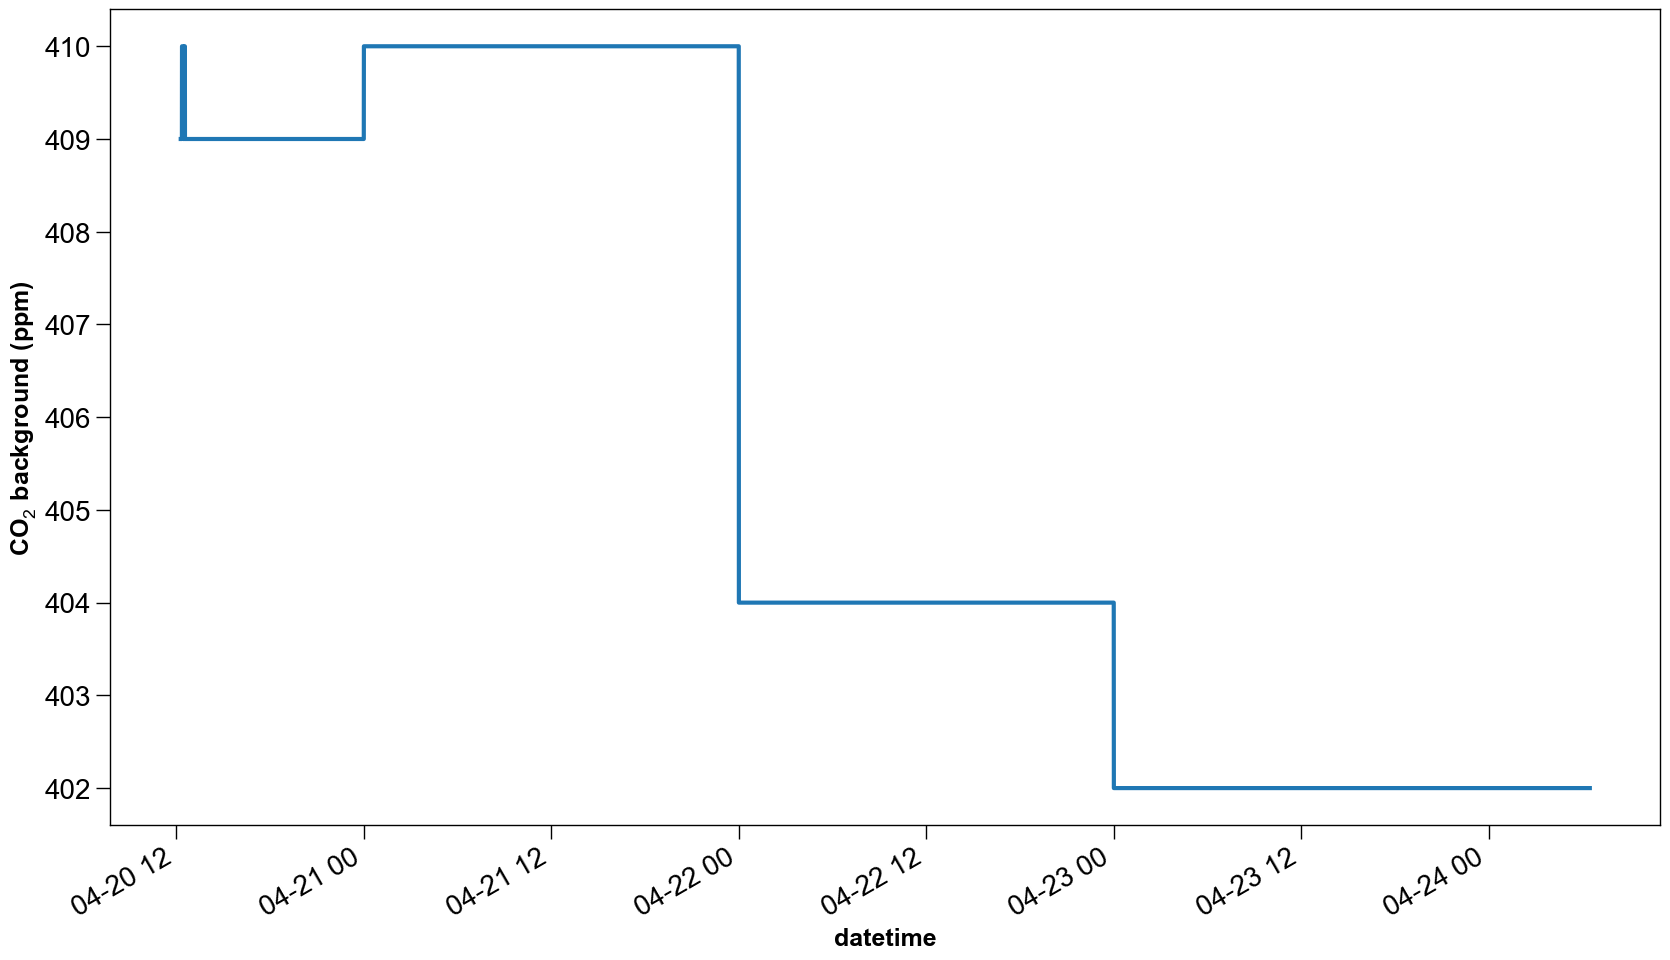

In [26]:
fig,ax = plt.subplots()

dfC.set_index('datetime')['CO2_offset'].plot(ax=ax)
ax.set_ylabel('CO$_2$ background (ppm)')

# Load updated gas data

In [32]:
fname = '/Users/jdabutler/Documents/+github/rx burn/unaligned gases/'

# Load 1 Hz data
NOx_hz = pd.read_csv(fname+'/NOx_1Hz.csv')
CO_hz = pd.read_csv(fname+'/CO_1Hz.csv')
CO2H_hz = pd.read_csv(fname+'/CO2_1Hz_Horiba.csv')
CO2L_hz = pd.read_csv(fname+'/CO2_1Hz_LICOR.csv')

NOx_hz.dropna(axis=1,inplace=True,how='all')
CO_hz.dropna(axis=1,inplace=True,how='all')
CO2H_hz.dropna(axis=1,inplace=True,how='all')
CO2L_hz.dropna(axis=1,inplace=True,how='all')
CO_hz.dropna(axis=0,how='all',inplace=True)

NOx_hz['datetime'] = NOx_hz.Date +' '+ NOx_hz.Time
CO_hz['datetime'] = CO_hz.Date + ' ' + CO_hz.Time
CO2H_hz['datetime'] = CO2H_hz.Date + ' ' + CO2H_hz.Time
CO2L_hz['datetime'] = CO2L_hz.Date + ' ' + CO2L_hz.Time

CO_hz.drop(['Date','Time'],axis=1,inplace=True)
CO2L_hz.drop(['Date','Time'],axis=1,inplace=True)
NOx_hz.drop(['Date','Time'],axis=1,inplace=True)
CO2H_hz.drop(['Date','Time'],axis=1,inplace=True)

# set datetime as index
NOx_hz.datetime = pd.to_datetime(NOx_hz.datetime)
CO_hz.datetime = pd.to_datetime(CO_hz.datetime)
CO2H_hz.datetime = pd.to_datetime(CO2H_hz.datetime)
CO2L_hz.datetime = pd.to_datetime(CO2L_hz.datetime)

CO2L_hz.rename({'CO2 (ppm)':'CO2 LICOR'},inplace=True,axis=1)
CO2L_hz.drop(['Comments'],inplace=True,axis=1)

# Apply datetime alignment / instrument response correction

## AE33

In [33]:
df50 = AE33.copy().reset_index()
new = df50.datetime + DateOffset(seconds = 51)
df50.loc[:,'datetime'] = new

#sample only dataset
dfs = df50[df50.Status.isin([0,128])]
df50min = dfs.set_index('datetime').resample('1T').mean()
df50min = df50min[['BC1','BC6','Temperature(°C)','Pressure(Pa)']]
df50[['BC1','BC6']].describe()
df50.index.duplicated().sum()

0

## ABCD

In [34]:
a = 0.5

df49 = ABCDhz.copy().reset_index()
new = df49.datetime + DateOffset(seconds = 54)
df49.loc[:,'datetime'] = new

# ATN limit of 100
ATN_tol = 100
mask49 = df49.ATN >= ATN_tol
df49.loc[mask49,'ATN'] = np.nan

df49['BC_c'] = df49['BC'] / ((a*np.exp(-df49.ATN/100))+(1-a)) # minutely AAP applied, use with caution 

# replace values less than 5 with NaN? 
# changed to 0 on 18 June 2024
mask = df49.BC_c < 0
df49.loc[mask,'BC_c'] = np.nan
df49.index.duplicated().sum()

0

## Original Gas

In [37]:
dfco = CO_hz.copy()
new = dfco.datetime - DateOffset(seconds=2)
dfco.loc[:,'datetime'] = new

dfl = CO2L_hz.copy()
new = dfl.datetime + DateOffset(seconds=29)
dfl.loc[:,'datetime'] = new

dfno = NOx_hz[['datetime','NO (ppm)']].copy()
new = dfno.datetime - DateOffset(seconds = 39)
dfno.loc[:,'datetime'] = new

dfno2 = NOx_hz[['datetime','NO2 (ppm)']].copy()
new = dfno2.datetime - DateOffset(seconds=57)
dfno2.loc[:,'datetime'] = new

dfnox = NOx_hz[['datetime','Nox (ppm)']].copy()
new = dfnox.datetime - DateOffset(seconds=42)
dfnox.loc[:,'datetime'] = new  

gasHz = pd.merge(dfco[['datetime','CO (ppm)']],dfl[['datetime','CO2 LICOR']],on='datetime',how='outer')
gasHz = pd.merge(gasHz,CO2H_hz[['datetime','CO2 (ppm)']],on='datetime')
gasHz = pd.merge(gasHz,dfno,on='datetime',how='outer')
gasHz = pd.merge(gasHz,dfno2,on='datetime',how='outer')
gasHz = pd.merge(gasHz,dfnox,on='datetime',how='outer')
gasHz = pd.merge(gasHz,df50[['datetime','BC1','BC6','Temperature(°C)','Pressure(Pa)','Status']],on='datetime',how='outer')
gasHz = pd.merge(gasHz,df49[['datetime','RH','Temp','ATN','BC','BC_c']],on='datetime',how='outer')

gasHz = gasHz.set_index('datetime').sort_index()
gasHz['BC1'] = gasHz['BC1']/1000
gasHz['BC6'] = gasHz['BC6']/1000
gasHz[gasHz.Status!=np.nan].head(10)
gasHz_old = gasHz

saved as alighed_1Hz_gas&BC_06-08-2022.csv

## Updated Gas with corrected background - June 2024

In [40]:
fname = '/Users/jdabutler/Documents/+github/rx burn/aligned CSV'
dfC = pd.read_csv(fname + '/CO_CO2_bac&offset_tsFixed.csv')
dfC.drop('Unnamed: 0',axis=1,inplace=True)
dfC.datetime = pd.to_datetime(dfC.datetime)

gasHz = dfC[['datetime','CO (ppm)','CO2 (ppm)','CO2H_e_base','CO2_offset']].copy().set_index('datetime')

# LICOR CO2
dfl = CO2L_hz.copy()
new = dfl.datetime + DateOffset(seconds=29)
dfl.loc[:,'datetime'] = new
dfl.set_index('datetime',inplace=True)
gasHz = gasHz.join(dfl,how='outer')

# Nitrogen monoxide (NO)
dfno = NOx_hz[['datetime','NO (ppm)']].copy()
new = dfno.datetime - DateOffset(seconds = 39)
dfno.loc[:,'datetime'] = new
dfno.set_index('datetime',inplace=True)
gasHz = gasHz.join(dfno,how='outer')

# Nitrogen dioxide (NO2)
dfno2 = NOx_hz[['datetime','NO2 (ppm)']].copy()
new = dfno2.datetime - DateOffset(seconds=57)
dfno2.loc[:,'datetime'] = new
dfno2.set_index('datetime',inplace=True)
gasHz = gasHz.join(dfno2,how='outer')

# Nitrogen oxides (NOx)
dfnox = NOx_hz[['datetime','Nox (ppm)']].copy()
new = dfnox.datetime - DateOffset(seconds=42)
dfnox.loc[:,'datetime'] = new
dfnox.set_index('datetime',inplace=True)
gasHz = gasHz.join(dfnox,how='outer')

#join black carbon (BC) data to gasHz dataframe
gasHz = gasHz.join(df50[['datetime','BC1','BC6','Temperature(°C)','Pressure(Pa)','Status']].set_index('datetime'),how='outer')
gasHz = gasHz.join(df49[['datetime','RH','Temp','ATN','BC','BC_c']].set_index('datetime'),how='outer')

#convert from ng/m3 to ug/m3
gasHz['BC1'] = gasHz['BC1']/1000
gasHz['BC6'] = gasHz['BC6']/1000
gasHz.drop_duplicates(inplace=True)

gasHz = gasHz.groupby('datetime').mean()
gasHz[gasHz.Status!=np.nan].head(10)

,CO (ppm),CO2 (ppm),CO2H_e_base,CO2_offset,CO2 LICOR,NO (ppm),NO2 (ppm),Nox (ppm),BC1,BC6,Temperature(°C),Pressure(Pa),Status,RH,Temp,ATN,BC,BC_c
datetime,,,,,,,,,,,,,,,,,,
2021-04-20 11:58:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25.0,101325.0,3.0,NaN,NaN,NaN,NaN,NaN
2021-04-20 11:58:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25.0,101325.0,1.0,NaN,NaN,NaN,NaN,NaN
2021-04-20 11:58:09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25.0,101325.0,1.0,35.9,20.7205,4.79926,2323.693,2379.442334
2021-04-20 11:58:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25.0,101325.0,1.0,35.8,20.7359,5.74995,3132.078,3222.099658
2021-04-20 11:58:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25.0,101325.0,1.0,35.9,20.7460,7.35173,5347.295,5543.765863
2021-04-20 11:58:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25.0,101325.0,1.0,36.1,20.7541,8.82501,4933.171,5150.706254
2021-04-20 11:58:13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25.0,101325.0,1.0,36.4,20.7710,10.17497,4618.818,4853.597152
2021-04-20 11:58:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25.0,101325.0,1.0,36.8,20.7708,11.65918,5068.229,5363.351730
2021-04-20 11:58:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25.0,101325.0,1.0,37.3,20.7773,13.39918,6003.956,6405.595702


In [42]:
# check for duplicate values, make sure joins worked
for i in gasHz[gasHz.index.duplicated()].index:
    print(len(gasHz.loc[i]))
    print(gasHz.loc[i])

# Calculate Modified Combustion Efficiency (MCE)

In [43]:
#background = pd.concat([gasHz[d3S:d3b],gasHz[d4c:d4b1]])
#background.sort_index(inplace=True)
#background = gasHz[d3S:d3b].append(gasHz[d4c:d4b1])
#summary = background.describe()
#CO_b = summary.loc['mean','CO (ppm)'] #mean background CO from samples taken before burns on days 3 and 4
#CO2_b = summary.loc['mean','CO2 (ppm)_H'] #mean background CO from samples taken before burns on days 3 and 4
#print baseline CO and CO2
#print('CO baseline: {:.2} ppm'.format(CO_b))
#print('CO2 baseline: {:.4} ppm'.format(CO2_b))

gasHz['CO_e'] = np.nan
#gasHz['CO2H_e'] = np.nan

#calculate excess CO and CO2 from burn emissions by subtracting backgroun CO/CO2 from measured CO/CO2
CO_b = 0.0
gasHz['CO_e'] = gasHz['CO (ppm)'] - CO_b
gasHz.rename({'CO2H_e_base':'CO2H_e'},inplace=True,axis=1)

"""
CO2 background subtraction no longer necessary, Afsara has provided in dfC as column CO2H_e_base. I have renamed this column from 'CO2H_e_base' to 'CO2H_e'
"""

# ----------------------------------------------------------------------------------------------------------
# old daily CO2 background, replaced by Afsara tsFixed.csv
# CO2_b1 = 409 #summary.loc['mean','CO2 (ppm)_H']
# CO2_b2 = 410 #summary.loc['mean','CO2 (ppm)_H']
# CO2_b3 = 402 #summary.loc['mean','CO2 (ppm)_H']
# CO2_b4 = 405

#gasHz.loc['2021-04-20':'2021-04-21','CO2H_e'] = gasHz.loc['2021-04-20':'2021-04-21','CO2 (ppm)'] - CO2_b1
#gasHz.loc['2021-04-21':'2021-04-22','CO2H_e'] = gasHz.loc['2021-04-21':'2021-04-22','CO2 (ppm)'] - CO2_b2
#gasHz.loc['2021-04-22':'2021-04-23','CO2H_e'] = gasHz.loc['2021-04-22':'2021-04-23','CO2 (ppm)'] - CO2_b3
#gasHz.loc['2021-04-23':'2021-04-24','CO2H_e'] = gasHz.loc['2021-04-23':'2021-04-24','CO2 (ppm)'] - CO2_b4
#gasHz.loc[d4b1:d4e,'CO2H_e'] = gasHz.loc[d4b1:d4e,'CO2 (ppm)'] - CO2_b4
# ----------------------------------------------------------------------------------------------------------

df_e = gasHz[['CO_e','CO2H_e']]

mask = (gasHz.CO2H_e > 0) & (gasHz.CO_e > 0)
gasHz_temp = gasHz[mask]
gasHz_temp.loc[:,'MCE_hz'] = np.nan
gasHz_temp.loc[:,'MCE_hz'] = gasHz_temp.CO2H_e / (gasHz_temp.CO2H_e+gasHz_temp.CO_e)
gasHz = gasHz.join(gasHz_temp['MCE_hz'],on='datetime',how='outer')
gasHz

/var/folders/ft/cvp8z_vj1m9gr24vdrsn17rw0000gn/T/ipykernel_7003/856366835.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gasHz_temp.loc[:,'MCE_hz'] = np.nan
/var/folders/ft/cvp8z_vj1m9gr24vdrsn17rw0000gn/T/ipykernel_7003/856366835.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gasHz_temp.loc[:,'MCE_hz'] = gasHz_temp.CO2H_e / (gasHz_temp.CO2H_e+gasHz_temp.CO_e)


,CO (ppm),CO2 (ppm),CO2H_e,CO2_offset,CO2 LICOR,NO (ppm),NO2 (ppm),Nox (ppm),BC1,BC6,Temperature(°C),Pressure(Pa),Status,RH,Temp,ATN,BC,BC_c,CO_e,MCE_hz
datetime,,,,,,,,,,,,,,,,,,,,
2021-04-20 11:58:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25.0,101325.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-20 11:58:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25.0,101325.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-20 11:58:09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25.0,101325.0,1.0,35.9,20.7205,4.79926,2323.693,2379.442334,NaN,NaN
2021-04-20 11:58:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25.0,101325.0,1.0,35.8,20.7359,5.74995,3132.078,3222.099658,NaN,NaN
2021-04-20 11:58:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25.0,101325.0,1.0,35.9,20.7460,7.35173,5347.295,5543.765863,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-24 06:27:40,0.03,430.0,28.0,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.998930
2021-04-24 06:27:52,0.02,431.0,29.0,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.999311
2021-04-24 06:27:55,0.02,432.0,30.0,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.999334


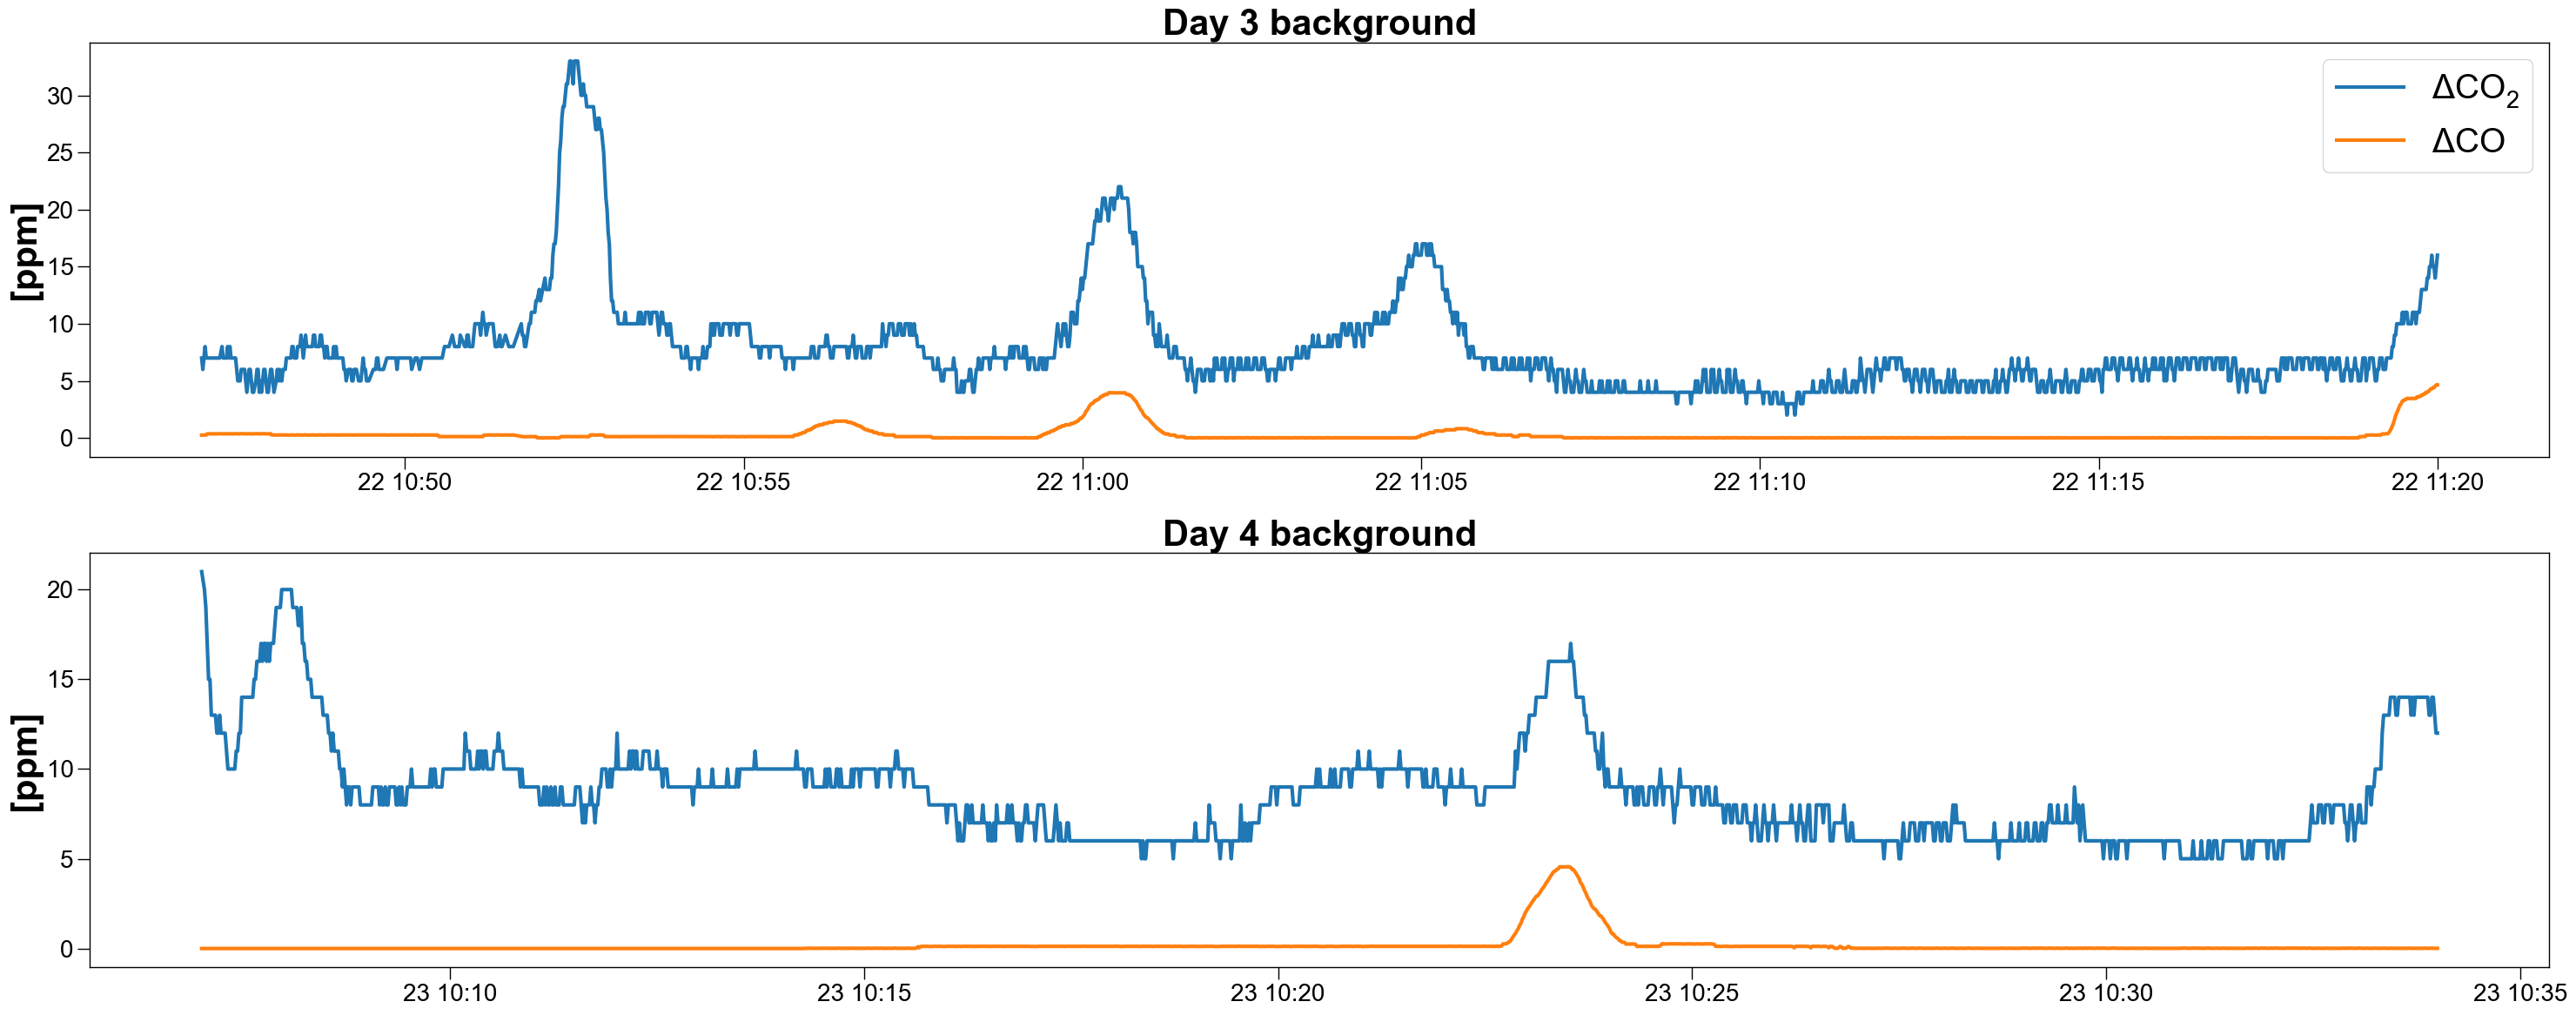

In [44]:
fig,ax = plt.subplots(2,1,figsize=(30,12))
ax[0].plot(gasHz.loc[d3S:d3b,'CO2H_e'],label='$\Delta$CO$_2$')
ax[0].plot(gasHz.loc[d3S:d3b,'CO_e'],label='$\Delta$CO')
ax[0].legend(fontsize=28)
ax[0].set_ylabel('[ppm]',fontsize=30,fontweight='bold')
ax[0].set_title('Day 3 background',fontsize=30,fontweight='bold')

ax[1].plot(gasHz.loc[d4c:d4b1,'CO2H_e'])
ax[1].plot(gasHz.loc[d4c:d4b1,'CO_e'])
ax[1].set_ylabel('[ppm]',fontsize=30,fontweight='bold')
ax[1].set_title('Day 4 background',fontsize=30,fontweight='bold')

fig.tight_layout()
#fig.savefig('excessDuringBackground.png')

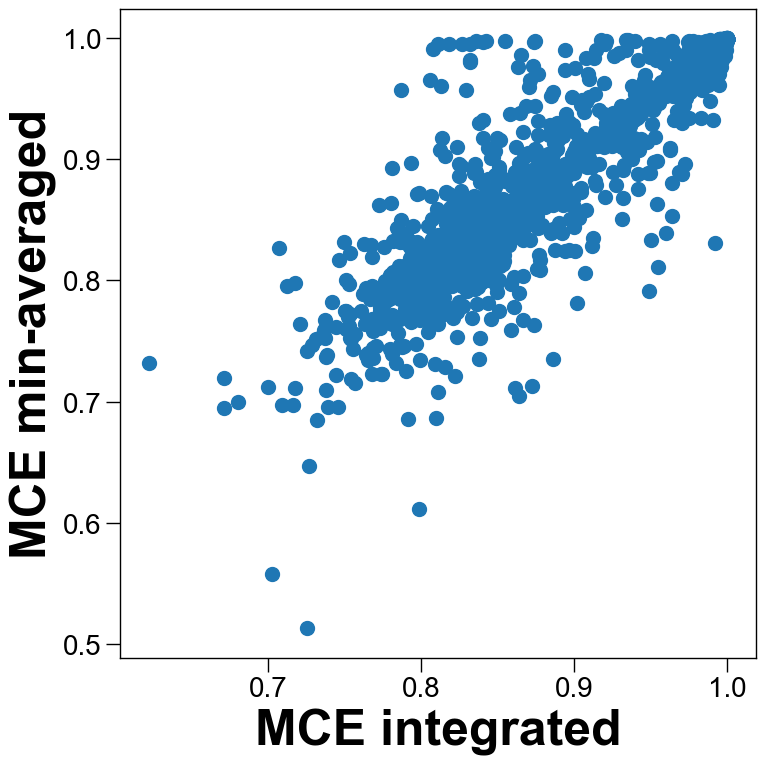

In [45]:
MCE_T = df_e.resample('1T').apply(np.trapz)

mask = (MCE_T.CO2H_e > 0) & (MCE_T.CO_e > 0)

MCE_T['MCE'] = MCE_T.CO2H_e[mask] / (MCE_T.CO_e[mask] + MCE_T.CO2H_e[mask])

compare = MCE_T.join(gasHz_temp['MCE_hz'], on='datetime',how='inner')

fig,ax = plt.subplots(figsize=(8,8))
ax.plot(compare.MCE,compare.MCE_hz,'o')
ax.set_xlabel('MCE integrated',fontweight='bold',fontsize=36)
ax.set_ylabel('MCE min-averaged',fontweight='bold',fontsize=36)
fig.tight_layout()

# Save aligned CSV files

In [46]:
folder = '/Users/jdabutler/Documents/+github/rx burn/aligned CSV'
df50.to_csv(folder + '/ground_AE33_1Hz_align.csv')
df49.to_csv(folder + '/ground_ABCD_1Hz_align.csv')
dfs.to_csv(folder + '/ground_AE33_1Hz_align_sampleonly.csv')
MCE_T.to_csv(folder + '/MCE_integrated_minutely.csv')

In [47]:
gasHz.dropna(how='all')
gasHz.to_csv(folder + '/aligned_1Hz_gas&BC_06-18-2024.csv')

# OLD minutely analysis with preliminary data

### Create minutely gas dataset to calculate MCE (old)

In [65]:
# #file path for NO, NO2, NOx, CO, and CO2 data
# baseGas = r'/Users/jdabutler/Documents/Blodgett Forest prescribed burn/CO-CO2-NOx'
# d1gas = r'day1_20210420_1min_gas.csv'
# d2gas = r'day2_20210421_1min_gas.csv'
# d3gas = r'day3_20210422_1min_gas.csv'
# d4gas = r'day4_20210423_1min_gas.csv'
# d1co2 = r'day1_20210420_1min_co2.csv'
# d2co2 = r'day2_20210421_1min_co2.csv'
# d3co2 = r'day3_20210422_1min_co2.csv'
# d4co2 = r'day4_20210423_1min_co2.csv'
# d1lc = r'day1_20210420_1min_licor.csv'
# d2lc = r'day2_20210421_1min_licor.csv'
# d3lc = r'day3_20210422_1min_licor.csv'
# d4lc = r'day4_20210423_1min_licor.csv'

# #load in each day of gas data
# df1g = pd.read_csv(baseGas + '/' + d1gas)
# df2g = pd.read_csv(baseGas + '/' + d2gas)
# df3g = pd.read_csv(baseGas + '/' + d3gas)
# df4g = pd.read_csv(baseGas + '/' + d4gas)
# df1co2 = pd.read_csv(baseGas + '/' + d1co2)
# df2co2 = pd.read_csv(baseGas + '/' + d2co2)
# df3co2 = pd.read_csv(baseGas + '/' + d3co2)
# df4co2 = pd.read_csv(baseGas + '/' + d4co2)
# df1lc = pd.read_csv(baseGas + '/' + d1lc)
# df2lc = pd.read_csv(baseGas + '/' + d2lc)
# df3lc = pd.read_csv(baseGas + '/' + d3lc)
# df4lc = pd.read_csv(baseGas + '/' + d4lc)

# #convert strings in gas dataframes to datetime dtype
# df1g.datetime = pd.to_datetime(df1g.datetime)
# df2g.datetime = pd.to_datetime(df2g.datetime)
# df3g.datetime = pd.to_datetime(df3g.datetime)
# df4g.datetime = pd.to_datetime(df4g.datetime)
# df1co2['datetime'] = pd.to_datetime('2021-04-20 ' + df1co2.Time)
# df2co2['datetime'] = pd.to_datetime('2021-04-21 ' + df2co2.Time)
# df3co2['datetime'] = pd.to_datetime('2021-04-22 ' + df3co2.Time)
# df4co2['datetime'] = pd.to_datetime('2021-04-23 ' + df4co2.Time)
# df1lc['datetime'] = pd.to_datetime('2021-04-20 ' + df1lc.Time)
# df2lc['datetime'] = pd.to_datetime('2021-04-21 ' + df2lc.Time)
# df3lc['datetime'] = pd.to_datetime('2021-04-22 ' + df3lc.Time)
# df4lc['datetime'] = pd.to_datetime('2021-04-23 ' + df4lc.Time)

# #set index of gas dataframes for each day to datetime
# df1g = df1g.set_index('datetime')
# df2g = df2g.set_index('datetime')
# df3g = df3g.set_index('datetime')
# df4g = df4g.set_index('datetime')
# df1co2 = df1co2.set_index('datetime')
# df2co2 = df2co2.set_index('datetime')
# df3co2 = df3co2.set_index('datetime')
# df4co2 = df4co2.set_index('datetime')
# df1lc = df1lc.set_index('datetime')
# df2lc = df2lc.set_index('datetime')
# df3lc = df3lc.set_index('datetime')
# df4lc = df4lc.set_index('datetime')

## create old gas, CO2, and licor full datasets

In [68]:
# dfg = df1g.append(df2g).append(df3g).append(df4g).sort_index()
# dfco2 = df1co2.append(df2co2).append(df3co2).append(df4co2).sort_index()
# dflc = df1lc.append(df2lc).append(df3lc).append(df4lc)

# #drop Time column from licor data
# dflc.drop(columns = 'Time',inplace=True)

## Save unaligned gas datasets for peak match / correlation analyses

In [69]:
# dfg.to_csv('Pandas CSV/gas_1min.csv')
# dfco2.to_csv('Pandas CSV/co2_1Hz.csv')
# dflc.to_csv('Pandas CSV/co2_licor_1Hz.csv')

In [70]:
# dfg.reset_index(inplace=True)
# dflc.reset_index(inplace=True)

### NOx - 1 min (old)

In [74]:
# # 4-minute offset to align NO, NO2, and NOx data
# df4off = dfg[['datetime','NO_cal','NO2_cal','NOx_cal']]

# df41 = df4off[(df4off.datetime > d1be) & (df4off.datetime < d1E)]
# df42 = df4off[(df4off.datetime > d2S) & (df4off.datetime < d4e)]

# new1 = df41.datetime - DateOffset(minutes = 4)
# new2 = df42.datetime - DateOffset(minutes = 1)

# df41.loc[:,'datetime'] = new1
# df42.loc[:,'datetime'] = new2

# NOx = df41.append(df42)
# NOx.set_index('datetime',inplace=True)

### CO -  1 min (old)

In [75]:
# CO = dfg[['datetime','CO_cal']]
# new = CO.datetime - DateOffset(minutes = 1)
# CO.loc[:,'datetime'] = new
# CO.set_index('datetime',inplace=True)
# CO.head(5)

### CO2 - 1 min (old)

In [76]:
# CO2 = dfco2.resample('1T').mean()
# CO2.head(5)

In [47]:
Min = CO.join(CO2['CO2_cal'],how='outer').join(NOx,how='outer')

In [48]:
#Min = pd.merge(df_1[['CO_cal']],CO2[['datetime','CO2_cal']],on='datetime',how='outer')
Min = Min.join(df50min,how='outer')
Min = Min.dropna(how='all')
Min.BC1 = Min.BC1/1000 #convert from ng/m3 to ug/m3
Min.BC6 = Min.BC6/1000 #convert from ng/m3 to ug/m3

Min['UV_BC'] = Min.BC1/Min.BC6

In [49]:
background = Min[d3S:d3b].append(Min[d4c:d4b1])
summary = background.describe()
CO_b = summary.loc['mean','CO_cal'] #mean background CO from samples taken before burns on days 3 and 4
CO2_b = summary.loc['mean','CO2_cal'] #mean background CO from samples taken before burns on days 3 and 4

#calculate excess CO and CO2 from burn emissions by subtracting backgroun CO/CO2 from measured CO/CO2
Min['CO_e'] = Min.CO_cal - CO_b 
Min['CO2_e'] = Min.CO2_cal - CO2_b

In [50]:
mask = (Min.CO2_e > 0) & (Min.CO_e > 0) #must have excess CO or CO2 in order to calculate MCE
Min_temp = Min[mask]
Min['MCE'] = Min_temp.CO2_e / (Min_temp.CO2_e + Min_temp.CO_e)
Min.head(5)

,CO_cal,CO2_cal,NO_cal,NO2_cal,NOx_cal,BC1,BC6,Temperature(°C),Pressure(Pa),UV_BC,CO_e,CO2_e,MCE
datetime,,,,,,,,,,,,,
2021-04-20 11:56:00,NaN,NaN,0.5360,0.0264,0.5630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-20 11:57:00,NaN,NaN,0.7230,0.0546,0.7770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-20 11:58:00,NaN,NaN,0.3790,0.1100,0.4890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-20 11:59:00,58.2,NaN,0.0608,0.0439,0.1050,NaN,NaN,NaN,NaN,NaN,58.212331,NaN,NaN
2021-04-20 12:00:00,30.8,NaN,0.0181,0.0131,0.0312,NaN,NaN,NaN,NaN,NaN,30.812331,NaN,NaN


In [101]:
#Min.to_csv(folder + '/minutely_gas&BC_align.csv')